In [7]:
import logging
import random
import pandas as pd
import seaborn as sns

# Express

You are very clever when it comes to solving Riddler Express puzzles. You are so clever, in fact, that you are in the top 10 percent of solvers in Riddler Nation (which, as you know, has a very large population). You don’t know where in the top 10 percent you are — in fact, you realize that you are equally likely to be anywhere in the topmost decile. Also, no two people in Riddler Nation are equally clever.

One Friday morning, you walk into a room with nine members randomly selected from Riddler Nation. What is the probability that you are the cleverest solver in the room?

In [2]:
me = []
other_max = []

for _ in range(100000): 
    me.append(random.uniform(90.0, 100.0))
    others = [random.uniform(0.0, 100.0) for _ in range(9)]
    other_max.append(max(others))

df_clever = pd.DataFrame({"me": me, "other": other_max})
df_clever[0:10]

,me,other
0,95.369026,72.045629
1,96.213535,95.641681
2,95.691041,97.136414
3,92.128841,97.020528
4,97.825032,97.997396
5,98.025576,99.908788
6,99.439649,51.336265
7,99.637050,97.280061
8,97.259774,98.077092
9,91.240334,98.120554


<AxesSubplot:>

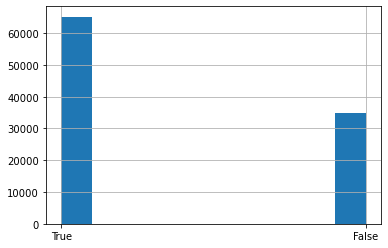

In [25]:
df_clever["me_vs_other"] = df_clever["me"] > df_clever["other"]
df_clever[0:10]
df_clever["me_vs_other"].astype(str).hist()

# Classic

You have four standard dice, and your goal is simple: Maximize the sum of your rolls. So you roll all four dice at once, hoping to achieve a high score.

But wait, there’s more! If you’re not happy with your roll, you can choose to reroll zero, one, two or three of the dice. In other words, you must “freeze” one or more dice and set them aside, never to be rerolled.

You repeat this process with the remaining dice — you roll them all and then freeze at least one. You repeat this process until all the dice are frozen.

If you play strategically, what score can you expect to achieve on average?

Extra credit: Instead of four dice, what if you start with five dice? What if you start with six dice? What if you start with N dice?

In [4]:
random.randint(1, 6)

4

In [13]:
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

def rollall(n):
    return roll(n, [])

def roll(n, frozen):
    if n <= 0:
        return frozen
    else:
        rolled = [random.randint(1, 6) for _ in range(n)]
        logger.debug(f"frozen {str(frozen):12} -> rolled {n} {rolled}")        
        nsixes = sum(map(lambda x: x == 6, rolled))
        nfrozen = 0
        if nsixes > 0:
            for _ in range(nsixes):
                frozen.append(6)
            nfrozen = nsixes
        else:
            frozen.append(max(rolled))
            nfrozen = 1
        #print(n-nfrozen)
        #print(frozen)
        return roll(n-nfrozen, frozen)
    
print(rollall(4))

DEBUG:root:frozen []           -> rolled 4 [2, 3, 1, 4]
DEBUG:root:frozen [4]          -> rolled 3 [3, 4, 6]
DEBUG:root:frozen [4, 6]       -> rolled 2 [1, 6]
DEBUG:root:frozen [4, 6, 6]    -> rolled 1 [1]


[4, 6, 6, 1]


In [14]:
logger.setLevel(logging.WARNING)
rolls = []
for _ in range(100000):
    rolls.append(rollall(4))
df = pd.DataFrame({"rolls": rolls})
df['sum'] = df['rolls'].apply(sum)
df[0:10]

,rolls,sum
0,"[6, 6, 4, 1]",17
1,"[6, 6, 1, 2]",15
2,"[5, 6, 5, 2]",18
3,"[6, 4, 6, 2]",18
4,"[6, 5, 5, 4]",20
5,"[5, 6, 4, 4]",19
6,"[6, 6, 5, 2]",19
7,"[3, 2, 3, 3]",11
8,"[5, 5, 4, 1]",15
9,"[6, 5, 6, 1]",18


/home/matt/local/miniforge3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum', ylabel='Density'>

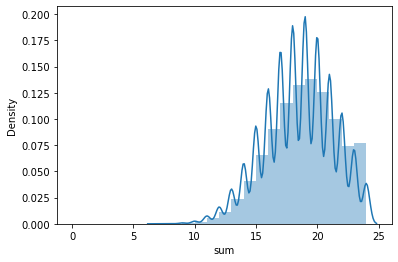

In [15]:
sns.distplot(df['sum'], bins=range(0,25))

In [58]:
df['sum'].mean()

18.51386

In [59]:
df['sum'].median()

19.0

In [70]:
rolls = []
for _ in range(100000):
    rolls.append(rollall(5))
df5 = pd.DataFrame({"rolls": rolls})
df5['sum'] = df5['rolls'].apply(sum)
df5[0:10]

,rolls,sum
0,"[6, 4, 6, 4, 2]",22
1,"[6, 6, 3, 5, 5]",25
2,"[6, 5, 4, 5, 2]",22
3,"[6, 6, 2, 3, 6]",23
4,"[5, 5, 2, 6, 6]",24
5,"[6, 6, 5, 4, 3]",24
6,"[6, 6, 5, 4, 6]",27
7,"[6, 4, 6, 6, 6]",28
8,"[5, 5, 6, 6, 6]",28
9,"[5, 4, 6, 4, 1]",20


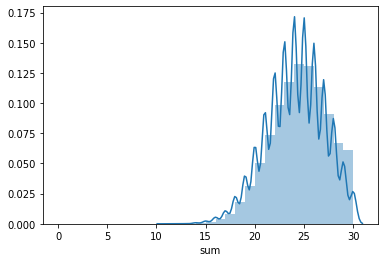

In [66]:
sns.distplot(df5['sum'], bins=range(0,31))

In [67]:
df5['sum'].mean()

24.10726

In [68]:
df5['sum'].median()

24.0